Data obtained from California DMV:

* 2023 Disengagement reports: https://www.dmv.ca.gov/portal/file/2023-autonomous-vehicle-disengagement-reports-csv/
* 2023 Mileage reports: https://www.dmv.ca.gov/portal/file/2023-autonomous-mileage-reports-csv/
* 2021 Disengagement reports: https://www.dmv.ca.gov/portal/file/2021-autonomous-vehicle-disengagement-reports-csv/
* 2021 Mileage reports: https://www.dmv.ca.gov/portal/file/2021-autonomous-mileage-reports-csv/


H0 = The amount of autonomous disengagements per miles driven are constant or increasing over time for cars manufactured in 2021 to 2023.
Ha = The amount of autonomous disengagements per miles driven have been reduced over time for cars manufactured in 2021 to 2023.

**1. Identify the top 2 largest autonomous vehicle companies by miles driven in 2023.**

In [2]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from dateutil.parser import parse
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/2023-Autonomous-Mileage.csv")
#print(df.head(5))

#data is input as strings. Remove commas, and change type from string to float.
df['ANNUAL TOTAL'] = df['ANNUAL TOTAL'].str.replace(',','').astype(float)

#group data frame by Manufacturer
df_miles = df.groupby(['Manufacturer']).sum().sort_values(by=['ANNUAL TOTAL'], ascending=False)

print(df_miles['ANNUAL TOTAL'])
print("unique mfg", df['Manufacturer'].nunique())


Mounted at /content/drive
Manufacturer
Waymo LLC                      3.669962e+06
Zoox, Inc                      7.104091e+05
CRUISE LLC                     5.836242e+05
APPLE INC.                     4.527439e+05
Nuro Inc                       1.040111e+05
Mercedes                       5.834269e+04
GHOST AUTONOMY INC             5.277080e+04
WERIDE CORP                    4.238129e+04
Motional AD, Inc.              1.621418e+04
Apollo                         1.531170e+04
aiMotive Inc.                  1.487641e+04
AutoX                          7.870000e+03
Nissan                         4.825000e+03
Woven by Toyota, U.S., Inc.    4.194000e+03
Didi Research America          4.004100e+03
QUALCOMM TECHNOLOGIES, INC.    3.837000e+03
BOSCH                          7.593100e+02
IMAGRY INC                     7.235600e+02
AURORA OPERATIONS, INC.        7.002600e+02
Gatik AI Inc                   6.340000e+02
Valeo North America            1.040000e+02
Name: ANNUAL TOTAL, dtype: float64
un

The top 2 companies by mileage are Waymo LLC and Zoox, Inc

**2a. Review the number of disengagements per miles driven for 2021 and 2023.**

In [3]:
#Read 2021 disengagements
diseng_2021 = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/2021-Disengagements.csv", encoding='cp1252')
#Convert Date column to Date format
diseng_2021['DATE'] = diseng_2021['DATE'].apply(lambda x: parse(x))
#print(diseng_2021.head())
dis_2021_mfg = diseng_2021.groupby(['Manufacturer']).size().reset_index(name='Disengagements')
print(dis_2021_mfg.head(5))


                        Manufacturer  Disengagements
0                      AIMOTIVE INC.             106
1  APOLLO AUTONOMOUS DRIVING USA LLC               1
2                         APPLE INC.             663
3                       ARGO AI, LLC               1
4            AURORA OPERATIONS, INC.               9


In [4]:
#Read 2021 Mileage
mileage_2021 = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/2021-Autonomous-Mileage.csv")
#data is input as strings. Remove commas, and change type from string to float.
mileage_2021['ANNUAL TOTAL'] = mileage_2021['ANNUAL TOTAL'].str.replace(',','').str.replace(' ','').astype(float)
#group data frame by Manufacturer. Sort optional.
mile_2021_mfg = mileage_2021.groupby(['Manufacturer']).sum().sort_values(by=['ANNUAL TOTAL'], ascending=False)

print(mile_2021_mfg['ANNUAL TOTAL'])

Manufacturer
WAYMO LLC                                                   2.325843e+06
CRUISE LLC                                                  8.761047e+05
PONY.AI, INC.                                               3.056167e+05
ZOOX, INC                                                   1.551250e+05
NURO, INC                                                   5.910002e+04
MERCEDES-BENZ RESEARCH & DEVELOPMENT NORTH AMERICA, INC.    5.861300e+04
WERIDE CORP                                                 5.796625e+04
AUTOX TECHNOLOGIES, INC                                     5.010800e+04
DIDI RESEARCH AMERICA LLC                                   4.074467e+04
ARGO AI, LLC                                                3.673387e+04
DEEPROUTE.AI                                                3.087200e+04
NVIDIA                                                      2.800400e+04
TOYOTA RESEARCH INSTITUTE, INC.                             1.395900e+04
APPLE INC.                            

In [5]:
#Inner join miles and number of disengagements per mfg
join_2021 = pd.merge(dis_2021_mfg, mile_2021_mfg, on=["Manufacturer"])

In [6]:
#calculate disengagements per miles for each mfg
join_2021['DisPerMiles'] = join_2021['Disengagements'].div(join_2021['ANNUAL TOTAL'])
#print(join_2021.head(5))
DisPerMiles_2021 = join_2021[['Manufacturer', 'DisPerMiles', 'ANNUAL TOTAL']].copy()
DisPerMiles_2021.rename(columns= {"DisPerMiles":"DisPerMiles2021", "ANNUAL TOTAL":"AnnualTotal2021" }, inplace=True)
print(DisPerMiles_2021)

                                         Manufacturer  DisPerMiles2021  \
0                                       AIMOTIVE INC.         0.035618   
1                   APOLLO AUTONOMOUS DRIVING USA LLC         0.000681   
2                                          APPLE INC.         0.049955   
3                                        ARGO AI, LLC         0.000027   
4                             AURORA OPERATIONS, INC.         0.000712   
5                             AUTOX TECHNOLOGIES, INC         0.000020   
6                                          CRUISE LLC         0.000024   
7                                        DEEPROUTE.AI         0.000065   
8                           DIDI RESEARCH AMERICA LLC         0.000025   
9                                            EASYMILE         0.693750   
10                                      GATIK AI INC.         0.003119   
11                                        IMAGRY INC.         0.097094   
12                                    

**2b. Review the number of disengagements per miles driven for 2023.**

In [7]:
#Read 2023 disengagements
diseng_2023 = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/2023-Disengagements.csv", encoding='cp1252')
#print(diseng_2023.head(5))
#Convert Date column to Date format
#diseng_2023['DATE'] = diseng_2023['DATE'].apply(lambda x: parse(x))

dis_2023_mfg = diseng_2023.groupby(['Manufacturer']).size().reset_index(name='Disengagements')

#Read 2023 Mileage
mileage_2023 = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/2023-Autonomous-Mileage.csv")
#data is input as strings. Remove commas, and change type from string to float.
mileage_2023['ANNUAL TOTAL'] = mileage_2023['ANNUAL TOTAL'].str.replace(',','').str.replace(' ','').astype(float)
#group data frame by Manufacturer
mile_2023_mfg = mileage_2023.groupby(['Manufacturer']).sum().sort_values(by=['ANNUAL TOTAL'], ascending=False)

#Inner join miles and number of disengagements per mfg
join_2023 = pd.merge(dis_2023_mfg, mile_2023_mfg, on=["Manufacturer"])
#calculate disengagements per miles for each mfg
join_2023['DisPerMiles'] = join_2023['Disengagements'].div(join_2023['ANNUAL TOTAL'])
#print(join_2023.head(5))
DisPerMiles_2023 = join_2023[['Manufacturer', 'DisPerMiles', 'ANNUAL TOTAL']].copy()
DisPerMiles_2023.rename(columns= {"DisPerMiles":"DisPerMiles2023", "ANNUAL TOTAL":"AnnualTotal2023" }, inplace=True)
print(DisPerMiles_2023)


                   Manufacturer  DisPerMiles2023  AnnualTotal2023
0                    APPLE INC.         0.007055        452743.90
1       AURORA OPERATIONS, INC.         0.067118           700.26
2                        Apollo         0.000196         15311.70
3                         BOSCH         0.413533           759.31
4         Didi Research America         0.000250          4004.10
5            GHOST AUTONOMY INC         0.019594         52770.80
6                  Gatik AI Inc         0.003155           634.00
7                   IMAGRY INC          0.171375           723.56
8             Motional AD, Inc.         0.036573         16214.18
9                      Nuro Inc         0.000452        104011.11
10  QUALCOMM TECHNOLOGIES, INC.         0.051342          3837.00
11                  WERIDE CORP         0.000047         42381.29
12                    Waymo LLC         0.000058       3669962.40
13  Woven by Toyota, U.S., Inc.         0.010014          4194.00
14        

In [8]:
#Join table by Manufacturer
DisPerMiles_2021["temp1"] = DisPerMiles_2021["Manufacturer"].str[:4]
DisPerMiles_2023["temp2"] = DisPerMiles_2023["Manufacturer"].str[:4]
changedf = pd.merge(DisPerMiles_2021, DisPerMiles_2023, left_on=DisPerMiles_2021['temp1'].str.lower(), right_on=DisPerMiles_2023['temp2'].str.lower(), how="left")
changedf = changedf.dropna()
#Calculate change in disengagement per miles from 2021 to 2023
changedf['DisengagementChange'] = changedf['DisPerMiles2023'].sub(changedf['DisPerMiles2021'])
print(changedf)

   key_0                     Manufacturer_x  DisPerMiles2021  AnnualTotal2021  \
0   aimo                      AIMOTIVE INC.         0.035618          2976.00   
1   apol  APOLLO AUTONOMOUS DRIVING USA LLC         0.000681          1467.50   
2   appl                         APPLE INC.         0.049955         13272.00   
4   auro            AURORA OPERATIONS, INC.         0.000712         12647.07   
8   didi          DIDI RESEARCH AMERICA LLC         0.000025         40744.67   
10  gati                      GATIK AI INC.         0.003119          1924.00   
11  imag                        IMAGRY INC.         0.097094           731.25   
15  nuro                          NURO, INC         0.000389         59100.02   
19  qual        QUALCOMM TECHNOLOGIES, INC.         0.087462          1635.00   
23  waym                          WAYMO LLC         0.000126       2325842.90   
24  weri                        WERIDE CORP         0.000052         57966.25   
25  zoox                    

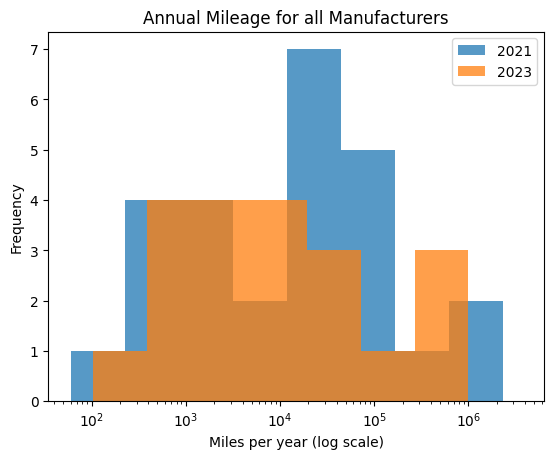

In [9]:
#Plot annual miles in 2021 and 2023

def plot_loghist(x, bins, lab):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins, label = lab, alpha= 0.75)
  plt.xscale('log')

plot_loghist(mile_2021_mfg['ANNUAL TOTAL'], 8, '2021')
plot_loghist(df_miles['ANNUAL TOTAL'], 8, '2023')

plt.xlabel('Miles per year (log scale)')
plt.xscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.title("Annual Mileage for all Manufacturers")
plt.show()

DescribeResult(nobs=12, minmax=(-0.042900031062633244, 0.07428085161072061), mean=0.006106481303920344, variance=0.0011607904626097908, skewness=0.8203482690478423, kurtosis=0.2223546506842511)


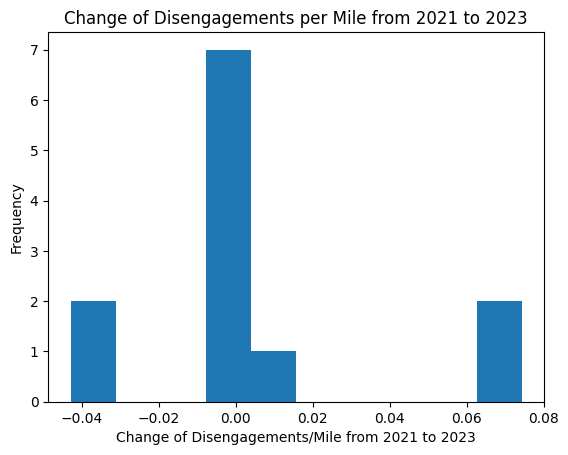

In [10]:
print(stats.describe(changedf['DisengagementChange']))
plt.hist(changedf['DisengagementChange'])
plt.title("Change of Disengagements per Mile from 2021 to 2023")
plt.ylabel('Frequency')
plt.xlabel('Change of Disengagements/Mile from 2021 to 2023')
plt.show()



*   Low sample size, n = 12
*   Skewness and Kutosis within +/- 3



In [11]:
stats.ttest_rel(changedf['DisPerMiles2021'], changedf['DisPerMiles2023'])

TtestResult(statistic=-0.6208758094644761, pvalue=0.5473305669882641, df=11)

p > 0.05, cannot reject null hypothesis H0.

Since the sample size is low, a different strategy will be used in analyzing the data. Compare the disengagements per mileage in 2021 to the disengagements per mileage in 2023.

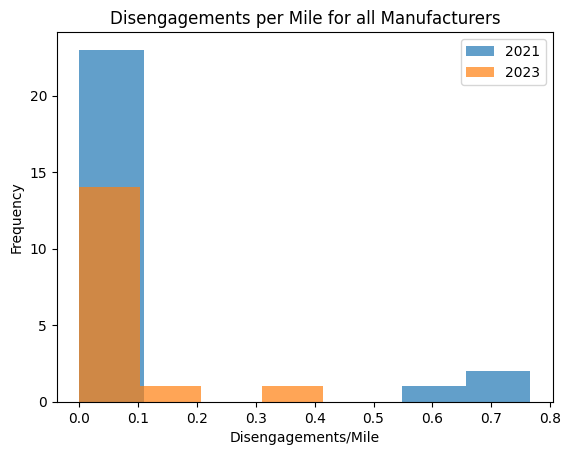

In [12]:
plt.hist(DisPerMiles_2021['DisPerMiles2021'], label='2021', alpha=0.7, bins=7)
plt.hist(DisPerMiles_2023['DisPerMiles2023'], label='2023', alpha=0.7, bins=4)
plt.title("Disengagements per Mile for all Manufacturers")
plt.ylabel('Frequency')
plt.xlabel('Disengagements/Mile')
plt.legend()
plt.show()

In [13]:
stats.ttest_ind(DisPerMiles_2021['DisPerMiles2021'], DisPerMiles_2023['DisPerMiles2023'])

TtestResult(statistic=0.6929251378925693, pvalue=0.492360353235307, df=40.0)

p > 0.05, cannot reject null hypothesis H0.
The amount of autonomous disengagements per miles driven are constant or increasing over time for cars manufactured in 2021 to 2023.

Additional plots for presentation:


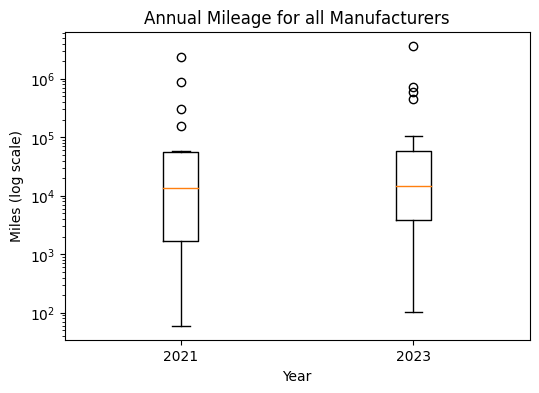

In [23]:
#Total miles driven in 2021 and 2023
fig = plt.figure(figsize=(6,4))
data = [mile_2021_mfg['ANNUAL TOTAL'], df_miles['ANNUAL TOTAL']]
plt.yscale('log')
plt.boxplot(data)
plt.title('Annual Mileage for all Manufacturers')
plt.ylabel('Miles (log scale)')
plt.xlabel('Year')
plt.xticks([1,2], [2021,2023])
plt.show()